In [1]:
# Importing packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [12]:
# Load the available data
train = pd.read_csv("../DATA/train_v9rqX0R.csv")
test = pd.read_csv("../DATA/test_AbJTz2l.csv")
print ("\n Data types : Train")
display(train.dtypes)
print ("\n Data overview for numerical features : Train")
display (train.describe())
print ("\n Data overview for numerical features : Test")

display(test.describe())


 Data types : Train


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


 Data overview for numerical features : Train


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800



 Data overview for numerical features : Test


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [14]:
# Structure summary for all columns
def structure_summary(df):
    s = pd.DataFrame({
        "dtype": df.dtypes,
        "n_missing": df.isna().sum(),
        "n_unique": df.nunique()
    }).sort_index()
    return s

summary = structure_summary(train)
display(summary)


,dtype,n_missing,n_unique
Item_Fat_Content,object,0,5
Item_Identifier,object,0,1559
Item_MRP,float64,0,5938
Item_Outlet_Sales,float64,0,3493
Item_Type,object,0,16
Item_Visibility,float64,0,7880
Item_Weight,float64,1463,415
Outlet_Establishment_Year,int64,0,9
Outlet_Identifier,object,0,10
Outlet_Location_Type,object,0,3


In [17]:
#Looking into categorical values
display(train['Item_Fat_Content'].value_counts())


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [18]:
#Looking into categorical values

display(train['Item_Identifier'].value_counts())


Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

In [20]:
#Looking into categorical values
display(train['Item_Type'].value_counts())


Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [23]:
#Looking into categorical values on outlet
display(train['Outlet_Identifier'].value_counts())
display(train['Outlet_Size'].value_counts())
display(train['Outlet_Establishment_Year'].value_counts())
display(train['Outlet_Location_Type'].value_counts())
display(train['Outlet_Type'].value_counts())

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

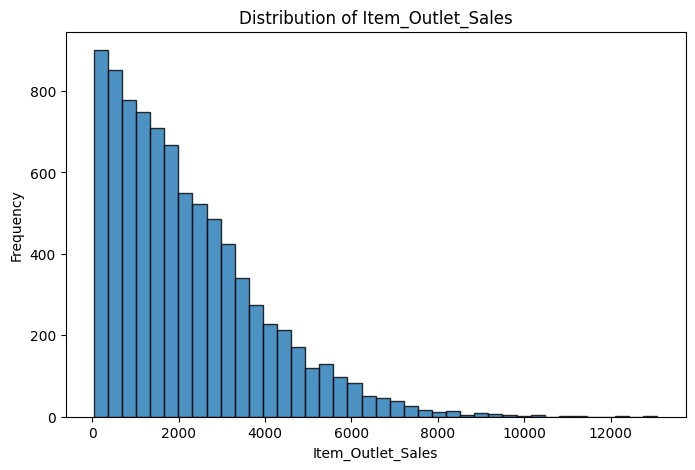

In [24]:
#Looking into target variable
y = pd.to_numeric(train["Item_Outlet_Sales"], errors="coerce").dropna().to_numpy()

# Histogram (Y label = Frequency)
plt.figure(figsize=(8,5))
plt.hist(y, bins=40, edgecolor="black", alpha=0.8)
plt.title("Distribution of Item_Outlet_Sales")
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Frequency")
plt.show()

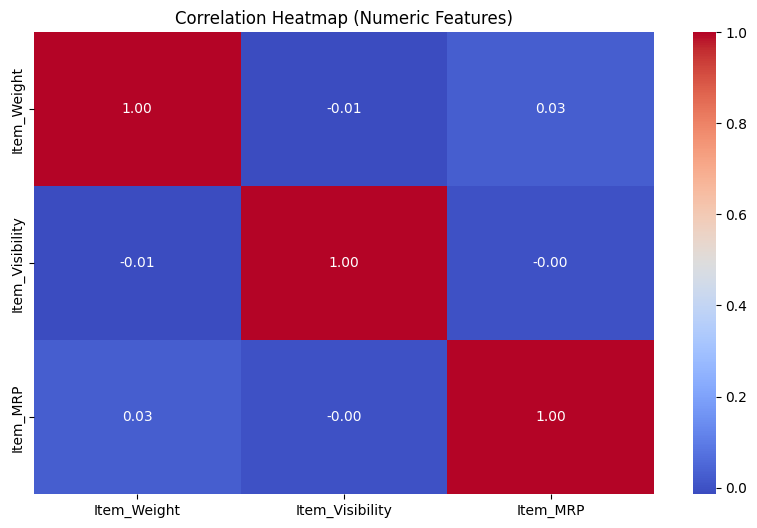


Strong Correlations (>|0.3|) if present:

Chi-Square Test: Significant Categorical Relations (p < 0.05)


,Feature1,Feature2,p-value
0,Item_Identifier,Item_Fat_Content,0.000000e+00
1,Item_Identifier,Item_Type,0.000000e+00
2,Item_Fat_Content,Item_Identifier,0.000000e+00
3,Item_Fat_Content,Item_Type,1.540854e-285
4,Item_Type,Item_Identifier,0.000000e+00
5,Item_Type,Item_Fat_Content,1.540854e-285
6,Outlet_Identifier,Outlet_Size,0.000000e+00
7,Outlet_Identifier,Outlet_Location_Type,0.000000e+00
8,Outlet_Identifier,Outlet_Type,0.000000e+00
9,Outlet_Size,Outlet_Identifier,0.000000e+00


In [27]:
# Feature Relationship Analysis

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 1. Correlation (Numeric Features)
numeric_cols = ["Item_Weight","Item_Visibility","Item_MRP"]

plt.figure(figsize=(10,6))
corr_matrix = train[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

# Print strong correlations
threshold = 0.7
print("\nStrong Correlations (>|0.3|) if present:")
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            print(f"{corr_matrix.columns[i]} ↔ {corr_matrix.columns[j]} : {corr_matrix.iloc[i, j]:.2f}")

# 2. Chi-Square (Categorical Features)
categorical_cols = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

chi_results = []
for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 != col2:  # avoid self comparison
            table = pd.crosstab(train[col1], train[col2])
            if table.shape[0] > 1 and table.shape[1] > 1:  # only valid crosstabs
                chi2, p, dof, ex = chi2_contingency(table)
                if p < 0.05:  # significant relation
                    chi_results.append((col1, col2, p))

chi_df = pd.DataFrame(chi_results, columns=["Feature1", "Feature2", "p-value"]).reset_index(drop=True)

print("\nChi-Square Test: Significant Categorical Relations (p < 0.05)")
display(chi_df)
